In [621]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lxml import objectify
%matplotlib inline

# Analysis of the lexical fields
from empath import Empath 

data_folder = './data/'

### Import of movie metadata

In [622]:
#Movie metadata import
df_movie = pd.read_table(data_folder +'movie.metadata.tsv',header=None)
df_movie.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID', 'Movie_name' , 'Movie_date' , 'Movie_revenue' , 'Movie_runtime' , 'Movie_languages' , 'Movie_countries' , 'Movie_genres']
df_movie


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


### Country of origin

There are often several countries for each movie. Thus, we consider that a movie is american when the USA belongs to the countries of origin of a movie.

In [623]:
df_movie = pd.read_table(data_folder +'movie.metadata.tsv',header=None)
df_movie.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID', 'Movie_name' , 'Movie_date' , 'Movie_revenue' , 'Movie_runtime' , 'Movie_languages' , 'Movie_countries' , 'Movie_genres']
df_movie['Movie_countries'] = df_movie['Movie_countries'].apply( lambda x: list(eval(x).keys()))
df_movie['Movie_genres'] = df_movie['Movie_genres'].apply( lambda x: list(eval(x).values()) )
countries = df_movie['Movie_countries'].explode().value_counts()


print('Number of american movies: '+str(countries['/m/09c7w0']))
print('Number of british movies: '+str(countries['/m/07ssc']))
print('Number of french movies: '+str(countries['/m/0f8l9c']))
print('Number of indian movies: '+str(countries['/m/03rk0']))
print('Number of chinese movies: '+str(countries['/m/0d05w3']))

Number of american movies:34408
Number of british movies:7868
Number of french movies:4395
Number of indian movies:8411
Number of chinese movies:645


### Selecting american movies

In [624]:
df_usa = df_movie.loc[df_movie['Movie_countries'].explode().isin(['/m/09c7w0'])[df_movie['Movie_countries'].explode().isin(['/m/09c7w0'])].index]

df_usa



,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...",[/m/09c7w0],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","[/m/0f8l9c, /m/09c7w0]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},[/m/09c7w0],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],[Drama]


### Import character metadata

In [625]:
#Character metadata
df_character = pd.read_table(data_folder +'character.metadata.tsv',header=None)
df_character.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID' , 'Movie_date' , 'Character_name' , 'Actor_date_of_birth' , 'Actor_gender' , 'Actor_height' , 'Actor_ethnicity' , 'Actor_name' , 'Actor_age_at_movie_release' , 'Freebase_character_actor_ID' , 'Freebase_character_ID' , 'Freebase_actor_ID'  ]

#Correct negative or too high actor age
df_character['Actor_age_at_movie_release']=df_character['Actor_age_at_movie_release'].apply(lambda x: -x if x<0 else x)
df_character['Actor_age_at_movie_release']=df_character['Actor_age_at_movie_release'].apply(lambda x: float("nan") if x>130 else x)



#Character of american movies
df_character_usa = df_character.merge(df_usa['Freebase_movie_ID'], on='Freebase_movie_ID')

#Number of american actor/actress citation
df_character_usa[df_character_usa['Actor_gender']=='F']['Actor_name'].value_counts().head(30)


Bette Davis          96
Mae Questel          95
Charlotte Burton     84
Joan Crawford        81
Claudette Colbert    79
Susan Sarandon       77
Cloris Leachman      75
Barbara Stanwyck     75
Myrna Loy            75
Blanche Sweet        74
Lillian Gish         71
Whoopi Goldberg      67
Kathy Bates          65
Vivian Rich          65
Mabel Normand        62
Joan Blondell        61
Lucille Ball         61
Daryl Hannah         61
Shelley Winters      59
Ginger Rogers        59
Mary Steenburgen     59
Mary Pickford        57
Karen Black          57
Gloria Swanson       57
Julianne Moore       56
Angela Lansbury      55
Loretta Young        55
Louise Lester        55
June Foray           55
Ellen Burstyn        54
Name: Actor_name, dtype: int64

### Revenue VS Runtime

<AxesSubplot:xlabel='Movie_runtime', ylabel='Movie_revenue'>

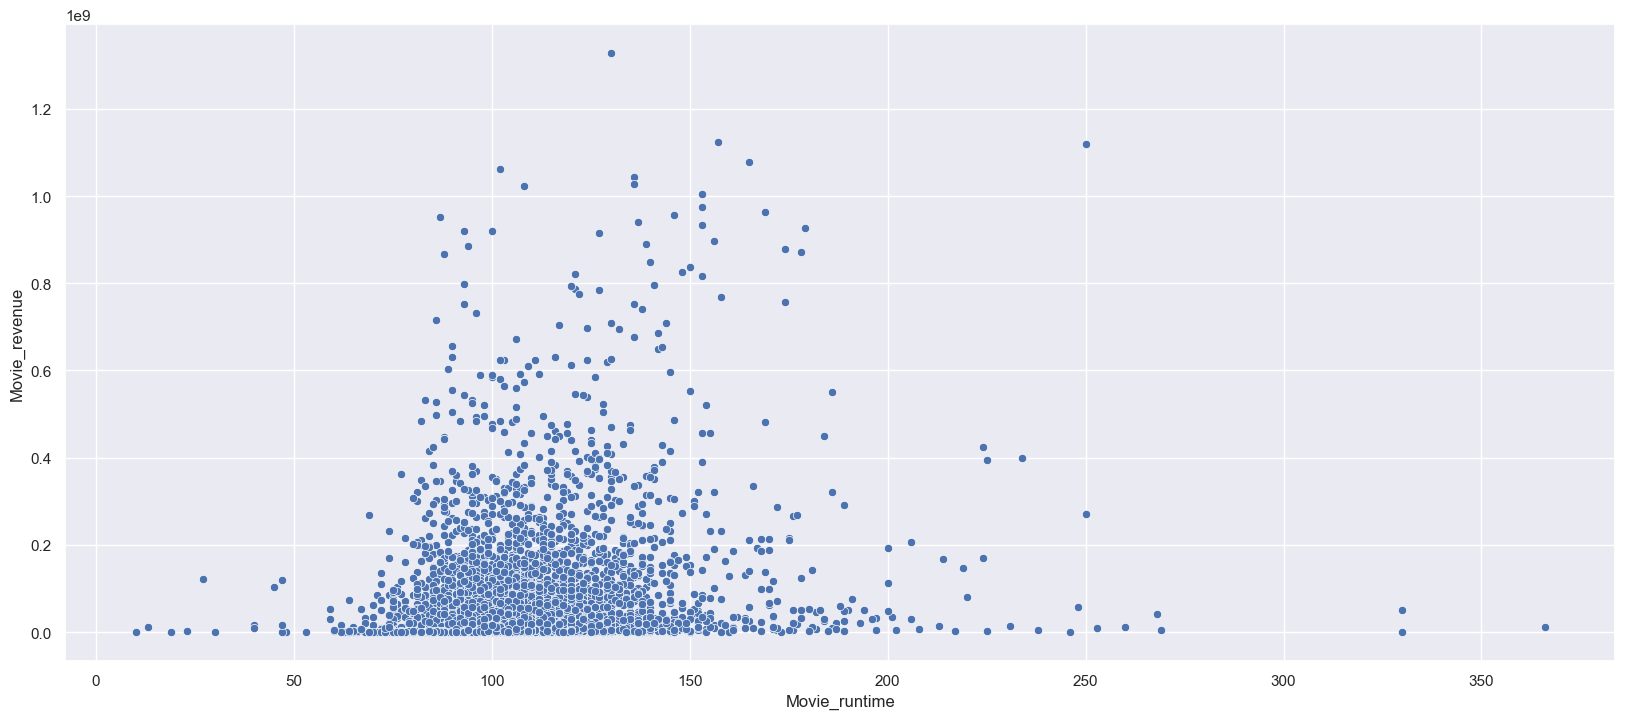

In [627]:
#Plot of revenue vs runtime
sns.scatterplot(data=df_revenue[(df_revenue.Movie_runtime<400) & (df_revenue.Movie_revenue<1500000000) ] , x='Movie_runtime' , y='Movie_revenue' )



### Genres

In [629]:

genre_count = df_usa['Movie_genres'].explode().value_counts()

#Dataframe with each rows corresponding to a genre

#Definition of the minimal number of movies per genre
min_genre = 1000

#Initialisation of the dictionnary
dic_genre_describe = dict.fromkeys(genre_count[genre_count > min_genre].index, [])
dic_usa_genre = dict.fromkeys(genre_count[genre_count > min_genre].index, [])

#Filling of the dictionnary
for ctr,genre in enumerate(dic_genre.keys()):
    #Movie metadata dataframe for each genre
    df_movie_temp = df_usa.loc[df_usa['Movie_genres'].explode()[df_usa['Movie_genres'].explode() == genre].index] 
    #Character metadata dataframe for each genre
    df_character_temp = df_character.merge(df_movie_temp['Freebase_movie_ID'], on='Freebase_movie_ID') #merge character and movie metadata dataframe

    
    #Adding character info into movie_metadata
    df_temp=pd.DataFrame()
    df_temp=pd.concat( [df_character_temp[df_character_temp.Actor_gender=='F'].groupby('Freebase_movie_ID').agg('count')['Actor_gender'],
                        df_character_temp[df_character_temp.Actor_gender=='F'].groupby('Freebase_movie_ID').agg('mean')['Actor_age_at_movie_release'],
                        df_character_temp[df_character_temp.Actor_gender=='M'].groupby('Freebase_movie_ID').agg('count')['Actor_gender'],
                        df_character_temp[df_character_temp.Actor_gender=='M'].groupby('Freebase_movie_ID').agg('mean')['Actor_age_at_movie_release'] ],axis=1)
    df_temp.columns=["Number_of_women","Mean_women_age","Number_of_men","Mean_men_age"]
    df_movie_temp = df_movie_temp.merge(df_temp, on='Freebase_movie_ID') #merge to add character info to movie info
    df_movie_temp['Women_percentage'] = (df_movie_temp['Number_of_women']/(df_movie_temp['Number_of_men']+df_movie_temp['Number_of_women']))*100
    
    #Dataframe for each genre are stored in a dictionnary
    dic_usa_genre[genre]={'movie_metadata':df_movie_temp,'character_metadata':df_character_temp}
    
    
    
    #Description features for each genre
    dic_genre_describe[genre] = {'Number_of_movies': len(df_movie_temp),
                        'Mean_age_f' : df_character_temp[df_character_temp.Actor_gender == 'F']['Actor_age_at_movie_release'].mean() ,
                        'Std_age_f' : df_character_temp[df_character_temp.Actor_gender == 'F']['Actor_age_at_movie_release'].std() ,
                        'Median_age_f' : df_character_temp[df_character_temp.Actor_gender == 'F']['Actor_age_at_movie_release'].median() ,
                        'Mean_number_f' : df_character_temp[ df_character_temp.Actor_gender == 'F'].groupby('Freebase_movie_ID')['Actor_gender'].agg('count').mean() ,
                        'Mean_age_m' : df_character_temp[df_character_temp.Actor_gender == 'M']['Actor_age_at_movie_release'].mean() ,
                        'Std_age_m' : df_character_temp[df_character_temp.Actor_gender == 'M']['Actor_age_at_movie_release'].std() ,
                        'Median_age_m' : df_character_temp[df_character_temp.Actor_gender == 'M']['Actor_age_at_movie_release'].median(),
                        'Mean_number_m': df_character_temp[ df_character_temp.Actor_gender == 'M'].groupby('Freebase_movie_ID')['Actor_gender'].agg('count').mean(),
                        'Mean_revenue': df_movie_temp['Movie_revenue'].mean()
                       }
    
df_usa_genre_describe = pd.DataFrame.from_dict(dic_genre_describe , orient='index')
df_usa_genre_describe['Women_percentage']= (df_usa_genre_describe['Mean_number_f']/(df_usa_genre_describe['Mean_number_m']+df_usa_genre_describe['Mean_number_f']))*100
df_usa_genre_describe



,Number_of_movies,Mean_age_f,Std_age_f,Median_age_f,Mean_number_f,Mean_age_m,Std_age_m,Median_age_m,Mean_number_m,Mean_revenue,Women_percentage
Drama,12538,34.013903,13.878031,31.0,3.184217,40.024402,14.117679,39.0,5.755829,4.645876e+07,35.617458
Comedy,9115,33.800720,13.869107,31.0,3.530468,40.017494,14.753428,39.0,5.818315,5.489366e+07,37.763931
Black-and-white,5636,26.647942,8.816352,26.0,1.935290,32.450879,11.397481,33.0,3.487460,5.871910e+06,35.688349
Indie,5026,34.529230,14.004121,32.0,3.157240,39.914259,14.916904,38.0,4.423708,1.381045e+07,41.647032
Short Film,3618,29.627451,14.581713,27.0,1.839822,36.053491,16.584710,37.0,2.730307,3.462173e+07,40.257554
Thriller,4789,33.640140,12.390569,31.0,3.088341,41.512585,13.270244,40.0,6.793052,7.818681e+07,31.254103
Action,4318,32.479209,11.544607,30.0,2.551957,41.206770,13.050850,40.0,7.305172,9.731999e+07,25.889454
Romance Film,4295,33.880395,13.594442,31.0,3.879732,39.478151,14.040987,37.0,5.947318,5.031139e+07,39.480126
Crime Fiction,3390,33.377184,12.316788,31.0,2.811884,40.861472,13.038430,39.0,6.655875,5.567000e+07,29.699575
Silent film,3046,18.923191,6.016497,20.0,1.637159,17.858124,11.821222,17.0,2.211646,5.099574e+06,42.536812


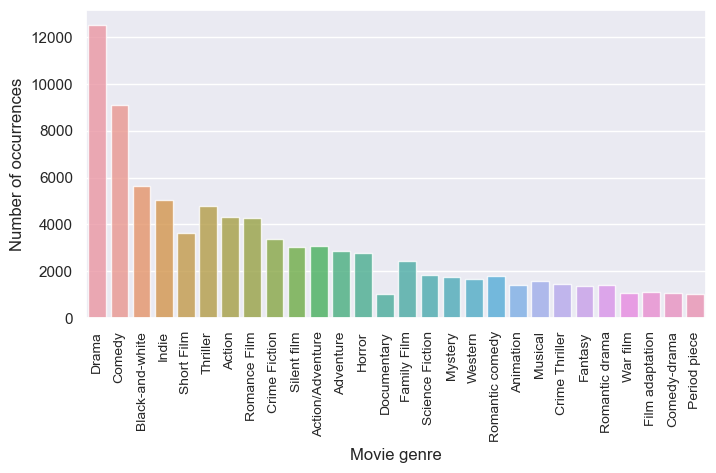

In [630]:
df=df_usa_genre_describe.copy()

plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['Number_of_movies'].index, y=df['Number_of_movies'].values, alpha=0.8)
ax.set_xlabel('Movie genre')
ax.set_ylabel('Number of occurrences')
ax.set_xticklabels(df['Number_of_movies'].index, rotation='vertical', fontsize=10)
plt.show()

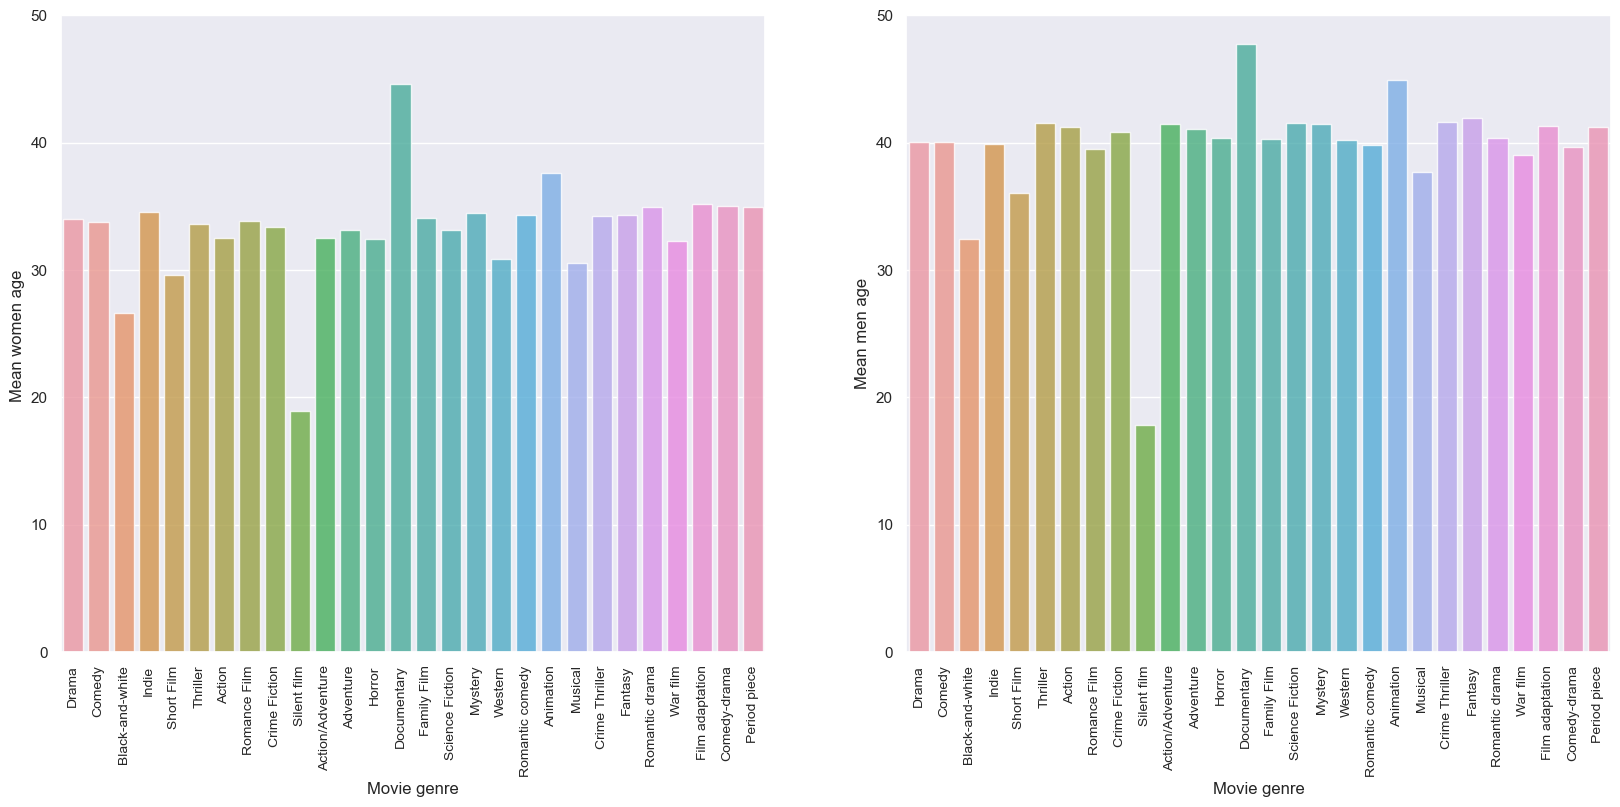

In [631]:
df=df_usa_genre_describe.copy()

fig, ax = plt.subplots(1, 2)
fig.figsize=(8,4)
sns.barplot(x=df['Mean_age_f'].index, y=df['Mean_age_f'].values, alpha=0.8, ax=ax[0])
sns.barplot(x=df['Mean_age_m'].index, y=df['Mean_age_m'].values, alpha=0.8, ax=ax[1])
ax[0].set_xlabel('Movie genre')
ax[1].set_xlabel('Movie genre')
ax[0].set_ylabel('Mean women age ')
ax[1].set_ylabel('Mean men age')
ax[0].set_xticklabels(df['Mean_age_f'].index, rotation='vertical', fontsize=10)
ax[1].set_xticklabels(df['Mean_age_m'].index, rotation='vertical', fontsize=10)
ax[0].set_ylim([0, 50])
ax[1].set_ylim([0, 50])
plt.show()

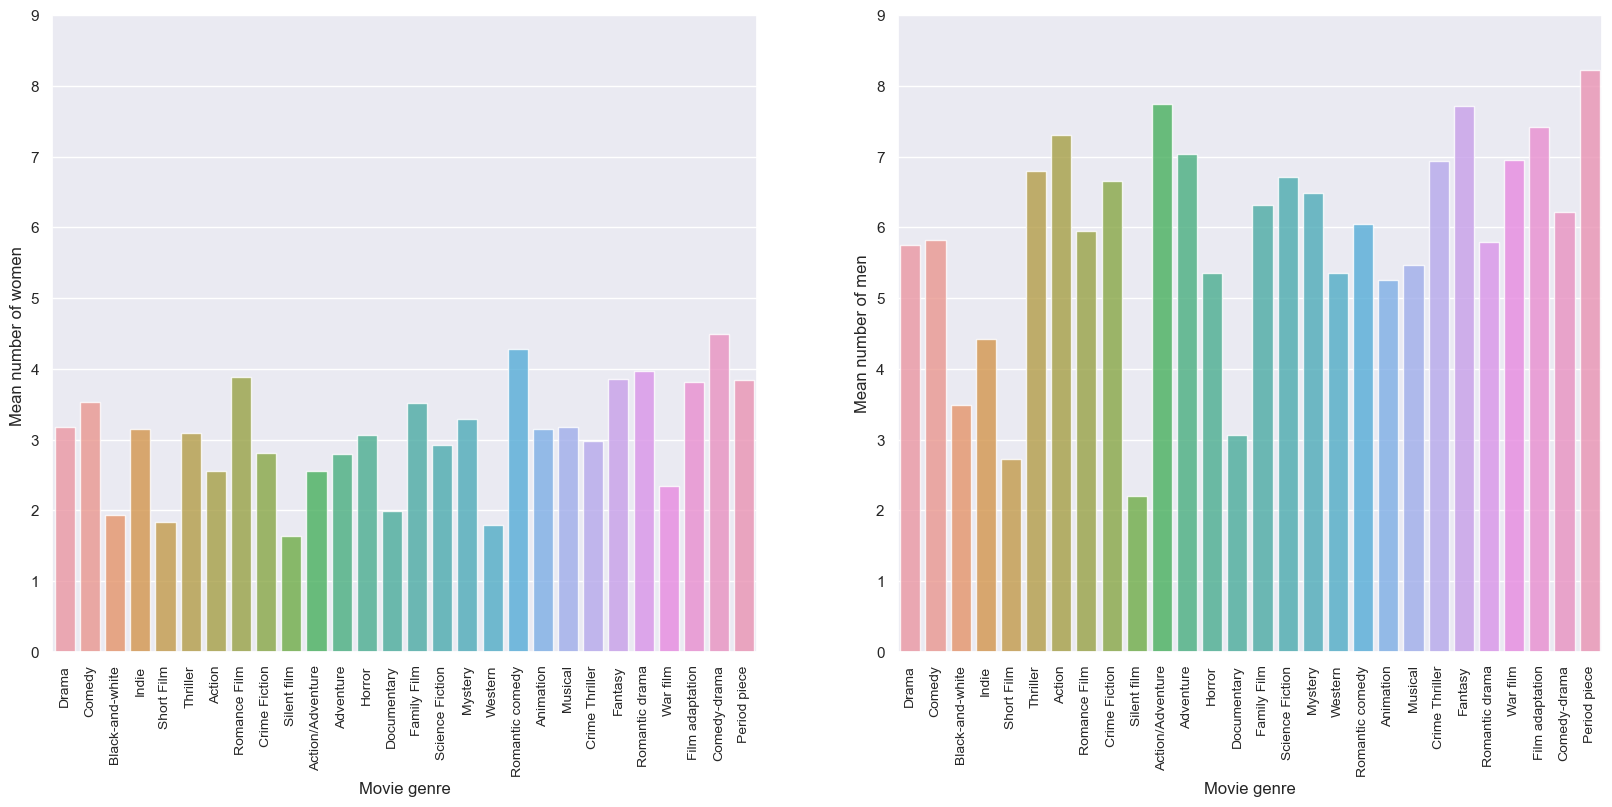

In [632]:
df = df_usa_genre_describe.copy()

fig, ax = plt.subplots(1, 2)
fig.figsize=(8,4)
sns.barplot(x=df['Mean_number_f'].index, y=df['Mean_number_f'].values, alpha=0.8, ax=ax[0])
sns.barplot(x=df['Mean_number_m'].index, y=df['Mean_number_m'].values, alpha=0.8, ax=ax[1])
ax[0].set_xlabel('Movie genre')
ax[1].set_xlabel('Movie genre')
ax[0].set_ylabel('Mean number of women ')
ax[1].set_ylabel('Mean number of men')
ax[0].set_xticklabels(df['Mean_number_f'].index, rotation='vertical', fontsize=10)
ax[1].set_xticklabels(df['Mean_number_m'].index, rotation='vertical', fontsize=10)
ax[0].set_ylim([0, 9])
ax[1].set_ylim([0, 9])
plt.show()

### Boxplot

<AxesSubplot:ylabel='Mean_women_age'>

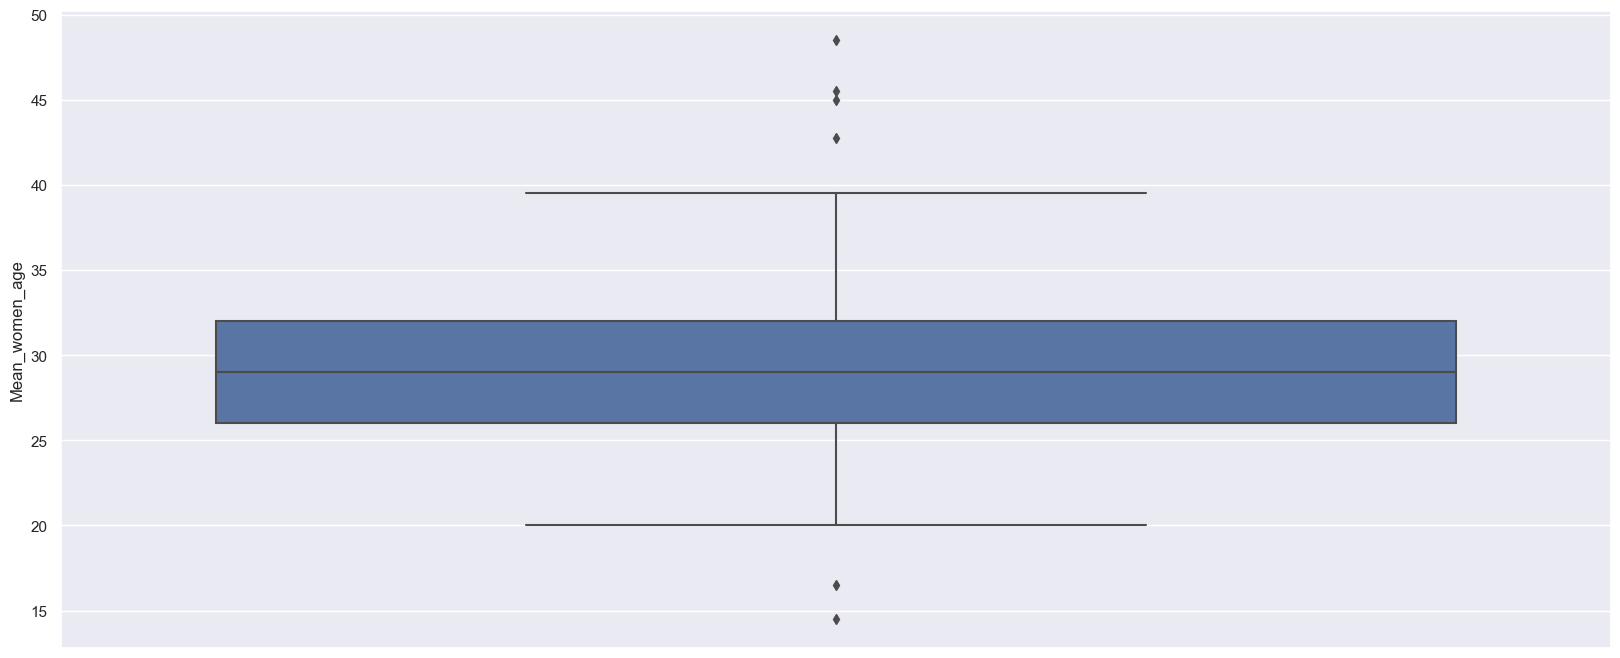

In [633]:
df=dic_usa_genre[genre]['movie_metadata']
sns.boxplot(data=df[df['Movie_date']<'1960'],y='Mean_women_age')


<AxesSubplot:ylabel='Mean_women_age'>

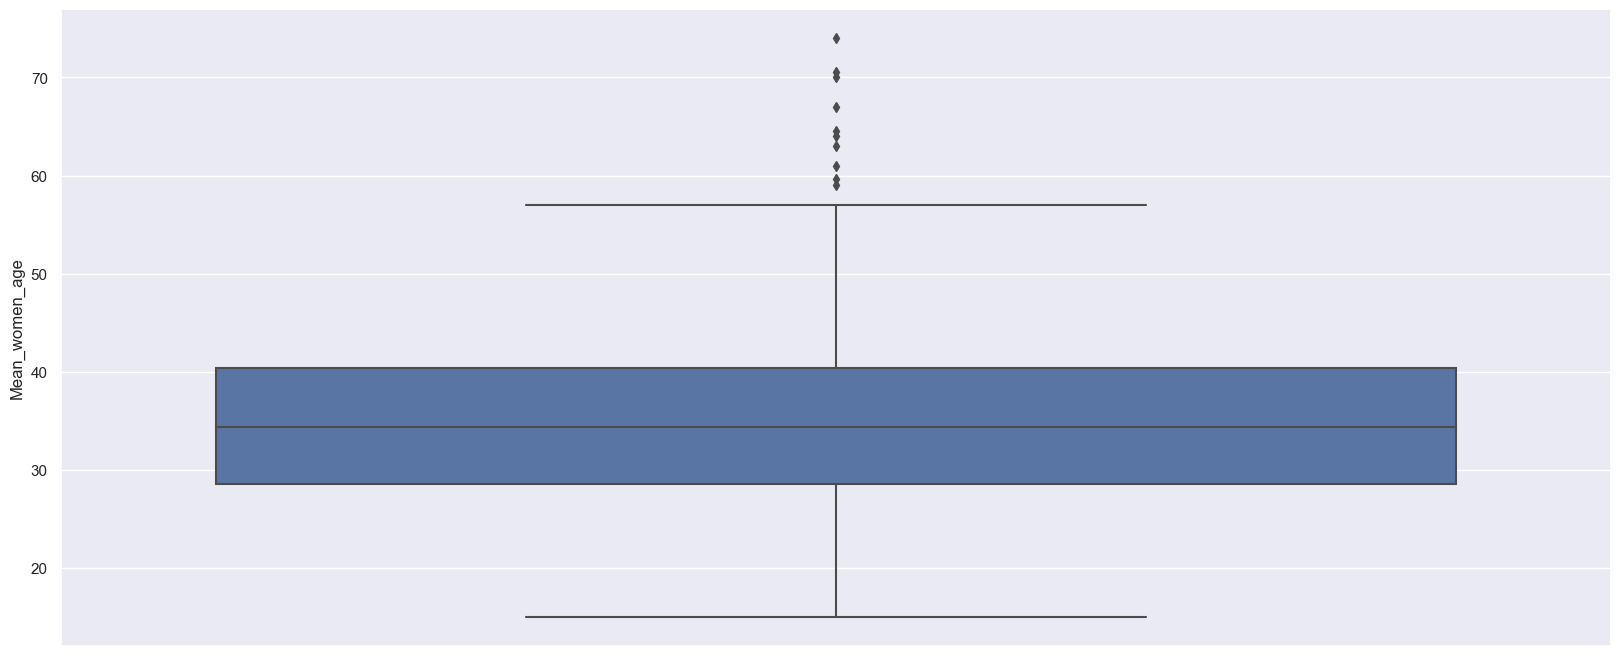

In [634]:
sns.boxplot(data=df[df['Movie_date']>'1960'],y='Mean_women_age')

### Linear regression

In [635]:

df=df_usa_genre.copy()


#Standardize continuous variable
df['Women_percentage'] = (df['Women_percentage'] - df['Women_percentage'].mean())/df['Women_percentage'].std()
df['Mean_age_f'] = (df['Mean_age_f'] - df['Mean_age_f'].mean())/df['Mean_age_f'].std()
df['Mean_age_m'] = (df['Mean_age_m'] - df['Mean_age_m'].mean())/df['Mean_age_m'].std()
df['Mean_revenue'] = (df['Mean_revenue'] - df['Mean_revenue'].mean())/df['Mean_revenue'].std()



# Declares the model
mod = smf.ols(formula='Women_percentage ~ (Mean_age_f) + (Mean_age_m) + (Mean_revenue)', data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)

res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:       Women_percentage   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.159
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00680
Time:                        14:30:00   Log-Likelihood:                -32.254
No. Observations:                  28   AIC:                             72.51
Df Residuals:                      24   BIC:                             77.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.025e-16      0.156   2.58e-15   

### Selecting movies only when we know the revenue

In [636]:
#Selecting a dataframe
df=df_usa
df_revenue_usa=df.dropna(subset=['Movie_revenue'])


print('Percentage of known american movies revenue:'+str(len(df_revenue_usa)/len(df_usa)*100)+' %')

Percentage of known american movies revenue:20.158102766798418 %


<AxesSubplot:xlabel='Movie_revenue', ylabel='Count'>

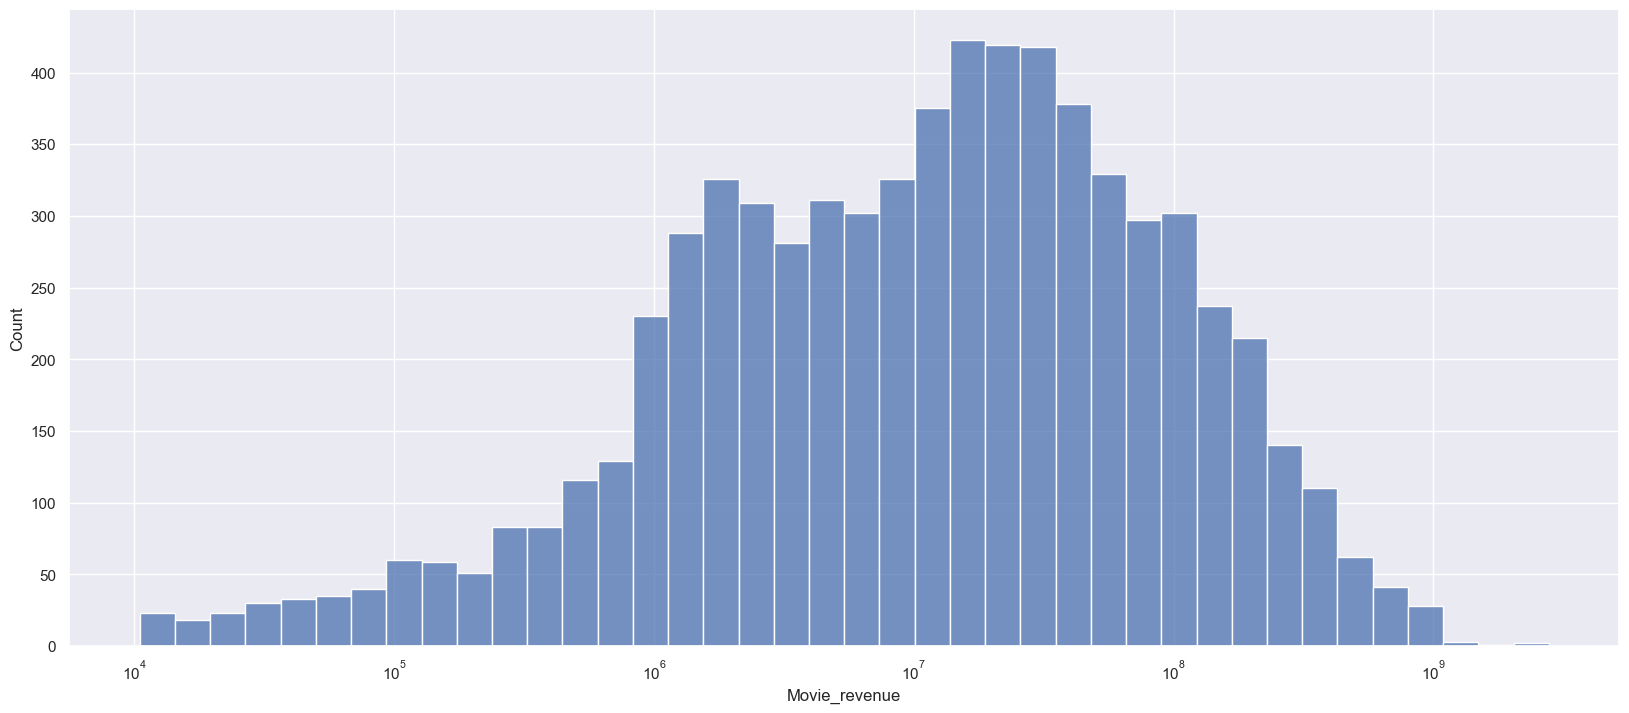

In [637]:
#See the distribution of movie revenues
sns.histplot(data=df_revenue_usa, x='Movie_revenue', stat = 'count' , log_scale= True)

### 50 more expensive movies

In [651]:
#Get the 50 more expensive movies
df_revenue.sort_values(by='Movie_revenue' , axis=0 , ascending = False)
df_most_expensive_movies = df_revenue.sort_values(by='Movie_revenue' , axis=0 , ascending = False).iloc[0:50]
df_most_expensive_movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","[/m/09c7w0, /m/07ssc]","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
22256,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...",[/m/09c7w0],"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ..."
28192,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ..."
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""..."
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."
80920,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","[/m/09c7w0, /m/0ctw_b]","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj..."
54719,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th..."
69586,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...",[/m/09c7w0],"{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil..."
14303,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f..."
50039,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ..."


### Principal characters: male or female?

In [665]:
df=df_most_expensive_movies.copy()

principal_character = []
for ctr,movie in enumerate(list(df['Wikipedia_movie_ID'].values)) :
    
    path = data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml'
    if os.path.exists(path):
        #Extract dataframe from xml file
        df_summary=pd.DataFrame()
        df_summary = pd.read_xml(data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml' , xpath='//token',parser='lxml')
        df_summary.rename(columns={'id':'word_id'},inplace=True)
        df_summary.insert(0, "sentence_id",df_summary['word_id'].ne(df_summary['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences 
        df_summary = df_summary[df_summary['NER'] == 'PERSON']
        principal_character.append( df_summary['word'].value_counts().index[0] )
        
df['Principal_character']=principal_character
df       
       


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,he_count,she_count,beautiful_quotes,Principal_character
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","[/m/09c7w0, /m/07ssc]","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0,1,0,Jake
22256,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...",[/m/09c7w0],"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...",9,12,0,Jack
28192,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",3,0,0,Loki
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""...",4,0,0,Harry
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",5,0,0,Carly
80920,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","[/m/09c7w0, /m/0ctw_b]","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",1,0,0,Frodo
54719,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",4,3,0,Bruce
69586,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...",[/m/09c7w0],"{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...",10,1,0,Woody
14303,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f...",2,3,0,Jack
50039,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",3,1,0,Anakin


### Lexical fields

In [652]:
#for ctr,genre in enumerate(dic_genre):
df=df_most_expensive_movies

#Initialization
lexicon = Empath()
df_lex_fields = pd.DataFrame()
dic_lex_fields=dict.fromkeys(df['Wikipedia_movie_ID'].values,[])

for ctr,movie in enumerate(list(df['Wikipedia_movie_ID'].values)) :

    path = data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml'
    if os.path.exists(path):
        #Extract dataframe from xml file
        df_summary=pd.DataFrame()
        df_summary = pd.read_xml(data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml' , xpath='//token',parser='lxml')
        df_summary.rename(columns={'id':'word_id'},inplace=True)
        df_summary.insert(0, "sentence_id",df_summary['word_id'].ne(df_summary['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences  


        features_lex_fields = pd.Series([lexicon.analyze(list(df_summary['word'].values), categories = ["feminine","sexist","sexiest","beauty","beautiful","positive_emotion","negative_emotion"])])

        dic_lex_fields[movie]= features_lex_fields[0]
        dic_lex_fields[movie]['Number_of_words']=len(df_summary)



df_lex_fields = pd.DataFrame.from_dict(dic_lex_fields, orient='index')  
df_lex_fields.insert(loc=0, column='Movie_name', value=df['Movie_name'].values)
df_lex_fields.insert(loc=1, column='Freebase_movie_ID', value=df['Freebase_movie_ID'].values)
df_most_expensive_movies_summary=df_most_expensive_movies.merge(df_lex_fields, on='Freebase_movie_ID')
df_most_expensive_movies_summary


#df_lex_fields[['Movie_name','Freebase_movie_ID','sexual']]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name_x,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_name_y,feminine,sexist,sexiest,beauty,beautiful,positive_emotion,negative_emotion,Number_of_words
0,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","[/m/09c7w0, /m/07ssc]","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Avatar,1.0,0.0,0.0,0.0,0.0,2.0,1.0,580
1,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...",[/m/09c7w0],"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...",Titanic,7.0,0.0,0.0,0.0,0.0,3.0,4.0,1032
2,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",The Avengers,0.0,0.0,0.0,0.0,0.0,2.0,3.0,763
3,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""...",Harry Potter and the Deathly Hallows – Part 2,0.0,0.0,0.0,0.0,0.0,3.0,16.0,832
4,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",Transformers: Dark of the Moon,2.0,0.0,0.0,0.0,0.0,1.0,4.0,795
5,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","[/m/09c7w0, /m/0ctw_b]","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",The Lord of the Rings: The Return of the King,0.0,0.0,0.0,0.0,0.0,4.0,4.0,838
6,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",The Dark Knight Rises,1.0,0.0,0.0,0.0,0.0,1.0,7.0,784
7,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...",[/m/09c7w0],"{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...",Toy Story 3,1.0,0.0,0.0,1.0,0.0,5.0,6.0,1043
8,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f...",Pirates of the Caribbean: On Stranger Tides,0.0,0.0,0.0,0.0,0.0,4.0,5.0,823
9,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",Star Wars Episode I: The Phantom Menace,0.0,0.0,0.0,0.0,0.0,1.0,4.0,840


### Number of occurence of lexical field

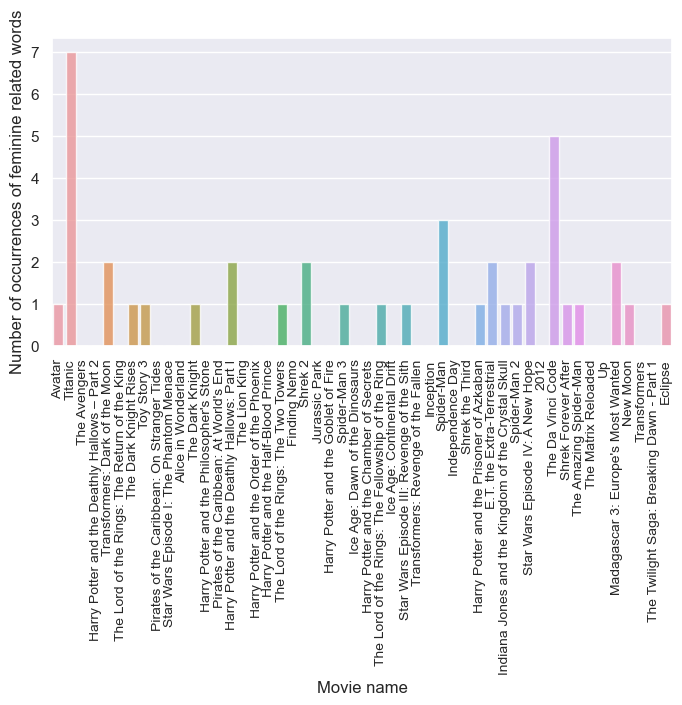

In [653]:
feature='feminine'

plt.figure(figsize=(8,4))
ax = sns.barplot(x=df_lex_fields['Movie_name'], y=df_lex_fields[feature].values, alpha=0.8)
ax.set_xlabel('Movie name')
ax.set_ylabel('Number of occurrences of '+feature+' related words')
ax.set_xticklabels(df_lex_fields['Movie_name'], rotation='vertical', fontsize=10)
plt.show()

### Positive VS negative emotion

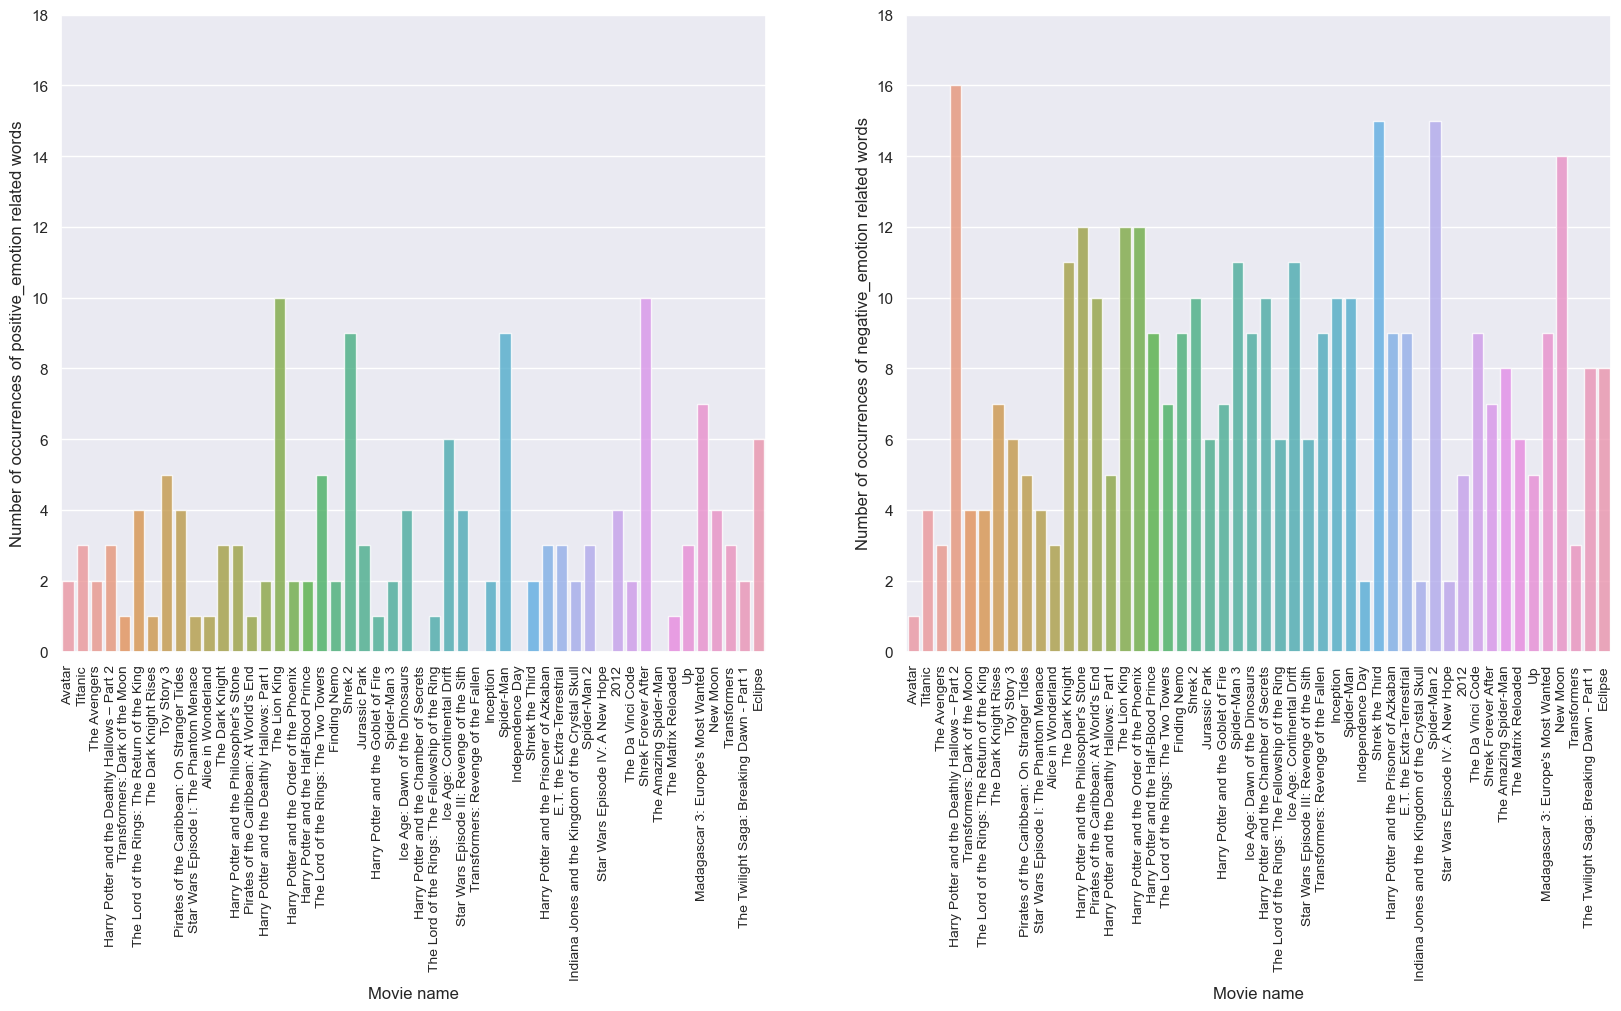

In [654]:
feature1='positive_emotion'
feature2='negative_emotion'

fig, ax = plt.subplots(1, 2)
fig.figsize=(8,4)
sns.barplot(x=df_lex_fields['Movie_name'], y=df_lex_fields[feature1].values, alpha=0.8, ax=ax[0])
sns.barplot(x=df_lex_fields['Movie_name'], y=df_lex_fields[feature2].values, alpha=0.8, ax=ax[1])
ax[0].set_xlabel('Movie name')
ax[1].set_xlabel('Movie name')
ax[0].set_ylabel('Number of occurrences of '+feature1+' related words')
ax[1].set_ylabel('Number of occurrences of '+feature2+' related words')
ax[0].set_xticklabels(df_lex_fields['Movie_name'], rotation='vertical', fontsize=10)
ax[1].set_xticklabels(df_lex_fields['Movie_name'], rotation='vertical', fontsize=10)
ax[0].set_ylim([0, 18])
ax[1].set_ylim([0, 18])
plt.show()



### Ratio of he/she used

In [655]:

he_count,she_count=[],[]
for ctr,movie in enumerate(list(df_most_expensive_movies['Wikipedia_movie_ID'].values)) :
    
    path = data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml'
    if os.path.exists(path):
        #Extract dataframe from xml file
        df_summary=pd.DataFrame()
        df_summary = pd.read_xml(data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml' , xpath='//token',parser='lxml')
        df_summary.rename(columns={'id':'word_id'},inplace=True)
        df_summary.insert(0, "sentence_id",df_summary['word_id'].ne(df_summary['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences  

        #Filter only the pronouns
        df_summary_pronouns= df_summary[df_summary.POS=='PRP']
        #Count the number of redundant words 
        personal_pronouns = df_summary_pronouns.groupby(['word'])['word'].count().sort_values(ascending=False)


        if 'he' in list(personal_pronouns.index):
            he_count.append( personal_pronouns['he'])
        else:
            he_count.append( 0 )

        if 'she' in list(personal_pronouns.index):
            she_count.append( personal_pronouns['she'] )
        else:
            she_count.append(0)
    else:
        he_count.append(float("nan"))
        she_count.append(float("nan"))
        
df_most_expensive_movies['he_count'] = he_count
df_most_expensive_movies['she_count'] = she_count
df_most_expensive_movies




,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,he_count,she_count
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","[/m/09c7w0, /m/07ssc]","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0,1
22256,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...",[/m/09c7w0],"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...",9,12
28192,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",3,0
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""...",4,0
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",5,0
80920,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","[/m/09c7w0, /m/0ctw_b]","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...",1,0
54719,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","[/m/09c7w0, /m/07ssc]","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",4,3
69586,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...",[/m/09c7w0],"{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...",10,1
14303,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f...",2,3
50039,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",3,1


In [643]:
#Mean of she and he
df_most_expensive_movies['she_count'].mean()/df_most_expensive_movies['he_count'].mean()




0.4191616766467066

### Adjective associated to a character (is beautiful adjectives associated to female character?)



In [645]:
#Beautiful woman ajectives
beautiful_woman_words = pd.read_csv(data_folder + 'beautiful_woman.txt',encoding='utf-16',names=['words'])['words'].tolist()

#Choose a df
df=df_summaries[29]

#Show the character names
if len(df)==0:
    print('No summary available')
else:
    character_names = df[df['NER'] == 'PERSON']['word'].value_counts()
    print(character_names)

    #List of adjectives associated

    adjectives=dict.fromkeys(character_names.index, [])

    for  ctr1,character_name in enumerate(character_names.index):
        adj=[]
        for ctr2,sentence in enumerate(df[df.word == character_name]['sentence_id'].values): #search adjectives in each sentence in which the character is cited  
            adj.append(df[(df.sentence_id==sentence) & ((df.POS=='JJ')| (df.POS=='NN')) ]['lemma'].values)
        adj=[adj[i].tolist() for i in range(len(adj))]
        adj=sum(adj, [])
        adjectives[character_name]=bool(set(adj) & set(beautiful_woman_words))   #test if words associated to the character are beautiful woman qualifying words
        #adjectives[character_name]=adj
 

    print(adjectives)


Sam              16
Mikaela           4
Simmons           4
Leo               3
Starscream        3
Alice             2
Mudflap           1
Robert            1
Devastator        1
Constructicon     1
Jetfire           1
Decepticon        1
Seymore           1
William           1
Lennox            1
Spitz             1
Banes             1
Witwicky          1
Allspark          1
Galloway          1
Theodore          1
Epps              1
Name: word, dtype: int64
{'Sam': False, 'Mikaela': False, 'Simmons': False, 'Leo': False, 'Starscream': False, 'Alice': False, 'Mudflap': False, 'Robert': False, 'Devastator': False, 'Constructicon': False, 'Jetfire': False, 'Decepticon': False, 'Seymore': False, 'William': False, 'Lennox': False, 'Spitz': False, 'Banes': False, 'Witwicky': False, 'Allspark': False, 'Galloway': False, 'Theodore': False, 'Epps': False}


### Time series

In [714]:
#Dataframe with existing movie summary
wiki_id_list = []
for ctr,wiki_id in enumerate(list(df_usa['Wikipedia_movie_ID'])) : 
    path = data_folder+'/corenlp_plot_summaries/'+str(wiki_id)+'.xml'
    if os.path.exists(path):
        wiki_id_list.append(wiki_id)
wiki_id_series = pd.Series(wiki_id_list, name='Wikipedia_movie_ID')

#Data frame (movie metadata) with only existing summaries 
df_usa_summary=df_usa.merge(wiki_id_series, on='Wikipedia_movie_ID')
df_usa_summary

#Data frame (character metadata) with only existing summaries
df_usa_character_summary=df_character_usa.merge(wiki_id_series, on='Wikipedia_movie_ID')
df_usa_character_summary

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185413,30553937,/m/0g9ts5h,1998-03-07,Steve,1959-04-02,M,NaN,NaN,Steve Monarque,38.0,/m/0jxtp_5,/m/0jxtp_8,/m/0bl1p7
185414,30553937,/m/0g9ts5h,1998-03-07,Mark,NaN,M,NaN,NaN,Kevin Richardson,NaN,/m/0jxtpzm,/m/0jxtpzq,/m/0jxtpzy
185415,30553937,/m/0g9ts5h,1998-03-07,Barbara,NaN,F,NaN,NaN,Leda Mulholland,NaN,/m/0jxtsvw,/m/0jxtsvz,/m/0gbyr6p
185416,30553937,/m/0g9ts5h,1998-03-07,Restaurant Manager,NaN,M,NaN,NaN,Randy Harris,NaN,/m/0jxtsx5,/m/0jxtsx8,/m/0jxtsxh


In [699]:
#Summary exploration
df=df_usa_summary

#Initialization
lexicon = Empath()
df_lex_fields = pd.DataFrame()
dic_lex_fields=dict.fromkeys(df['Wikipedia_movie_ID'].values,[])

for ctr,movie in enumerate(list(df['Wikipedia_movie_ID'].values)) :

    path = data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml'
    if os.path.exists(path):
        #Extract dataframe from xml file and convert it into a dataframe
        df_summary=pd.DataFrame()
        df_summary = pd.read_xml(data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml' , xpath='//token',parser='lxml')
        df_summary.rename(columns={'id':'word_id'},inplace=True)
        df_summary.insert(0, "sentence_id",df_summary['word_id'].ne(df_summary['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences  
        
        ###Lexical field analysis
        summary_words=list(df_summary['word'].values) #all words of the summary in a list
        summary_words=[str(word) for word in summary_words] #convert all words to a string
        features_lex_fields = pd.Series([lexicon.analyze(list(summary_words), categories = ["feminine","sexist","sexiest","beauty","beautiful","positive_emotion","negative_emotion"])])
        #Store data into a dictionnary
        dic_lex_fields[movie]= features_lex_fields[0]
        #Add a column corresponding to the number of words in the summary
        dic_lex_fields[movie]['Number_of_words']=len(df_summary)
        
        
        
        ###Count of he/she        
        #Filter only the pronouns
        df_summary_pronouns= df_summary[df_summary.POS=='PRP']
        #Count the number of redundant words 
        personal_pronouns = df_summary_pronouns.groupby(['word'])['word'].count().sort_values(ascending=False)

        if 'he' in list(personal_pronouns.index):
            dic_lex_fields[movie]['he_count'] = personal_pronouns['he']
        else:
            dic_lex_fields[movie]['he_count'] = 0

        if 'she' in list(personal_pronouns.index):
            dic_lex_fields[movie]['she_count'] = personal_pronouns['she'] 
        else:
            dic_lex_fields[movie]['she_count'] = 0
        
        
        
        ###Principal characters according to the summary
        characters_name = df_summary[df_summary['NER'] == 'PERSON']['word'].value_counts().index
        if len(characters_name)>=2:
            dic_lex_fields[movie]['Principal_summary_character'] =  characters_name[0] 
            dic_lex_fields[movie]['Secondary_summary_character'] =  characters_name[1] 
        if len(characters_name)==1:
            dic_lex_fields[movie]['Principal_summary_character'] =  characters_name[0] 
            dic_lex_fields[movie]['Secondary_summary_character'] =  float('nan')    
        if len(characters_name)==0:
            dic_lex_fields[movie]['Principal_summary_character'] =  float('nan')
            dic_lex_fields[movie]['Secondary_summary_character'] =  float('nan')   

     


    


df_lex_fields = pd.DataFrame.from_dict(dic_lex_fields, orient='index')  
#df_lex_fields.insert(loc=0, column='Movie_name', value=df['Movie_name'].values)
df_lex_fields.insert(loc=1, column='Freebase_movie_ID', value=df['Freebase_movie_ID'].values)
df_usa_summary_processed=df_usa_summary.merge(df_lex_fields, on='Freebase_movie_ID')
df_usa_summary_processed

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,feminine,...,sexiest,beauty,beautiful,positive_emotion,negative_emotion,Number_of_words,he_count,she_count,Principal_summary_character,Secondary_summary_character
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Thriller, Science Fiction, Horror, Adventure,...",1.0,...,0.0,0.0,0.0,0.0,7.0,396,1,0,Ballard,Williams
1,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Romantic comedy, Ensemble Film, Comedy-drama,...",3.0,...,0.0,0.0,0.0,2.0,2.0,257,2,5,Adam,Kate
2,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Science Fiction, Adventure, Animation, Short ...",1.0,...,0.0,1.0,0.0,0.0,3.0,707,4,2,Lois,Clark
3,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Children's/Family, Musical, Fantasy, Comedy, ...",1.0,...,0.0,1.0,0.0,8.0,5.0,1678,12,7,Mary,Banks
4,21926710,/m/05p45cv,White on Rice,2009,NaN,82.0,{},[/m/09c7w0],"[Romantic comedy, Romance Film, Comedy, Indie]",1.0,...,0.0,1.0,0.0,2.0,0.0,125,3,0,Jimmy,Tak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],"[Alien Film, Science Fiction, Family Film, Com...",0.0,...,0.0,0.0,0.0,2.0,4.0,639,1,0,Bipto,Wrenchmuller
20785,26044505,/m/0b6m67n,The Flying Serpent,1946,NaN,59.0,{},[/m/09c7w0],"[Thriller, B-movie, Horror]",0.0,...,0.0,0.0,0.0,0.0,3.0,37,1,0,Andrew,Forbes
20786,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","[/m/0f8l9c, /m/09c7w0]","[Parody, Americana, Comedy]",1.0,...,0.0,0.0,0.0,2.0,1.0,252,1,1,Carla,Walt
20787,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},[/m/09c7w0],"[Thriller, Erotic thriller, Psychological thri...",1.0,...,0.0,0.0,0.0,1.0,9.0,611,6,8,Greenhill,Haines


In [711]:
df=df_usa_summary_processed.copy()

df['feminine_standardized']=df['feminine']/df['Number_of_words']
df['beauty_standardized']=df['beauty']/df['Number_of_words']


df_1950_2000=df[ (df['Movie_date'] < '2000') & (df['Movie_date'] > '1950') ]
df_2000_2012=df[ (df['Movie_date'] > '2000') ]


print('Mean of 1950-2000 over '+str(len(df_1950_2000))+' movies : '+ str(df_1950_2000['feminine_standardized'].mean()))
print('Mean of 2000-2012 over '+str(len(df_2000_2012))+' movies : '+ str(df_2000_2012['feminine_standardized'].mean()))



Mean of 1950-2000 over 9579 movies : 0.002748131403022691
Mean of 2000-2012 over 6575 movies : 0.0025626653458635466


In [713]:
df[df.Number_of_words==max(df.Number_of_words)]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,feminine,...,beautiful,positive_emotion,negative_emotion,Number_of_words,he_count,she_count,Principal_summary_character,Secondary_summary_character,feminine_standardized,beauty_standardized
12715,22175264,/m/05q8l9b,Wishology,NaN,NaN,180.0,"{""/m/02h40lc"": ""English Language""}",[/m/09c7w0],[Fantasy],5.0,...,0.0,22.0,30.0,5579,97,0,Timmy,Jorgen,0.000896,0.000358


### Is principal character a men or a women?

In [780]:
df1 = df_usa_summary_processed.copy()
df2 = df_usa_character_summary.copy()
#df1=df1[['Freebase_movie_ID','Principal_summary_character']]
#df2=df2[['Freebase_movie_ID','Character_name']]
sex=[]
for ctr,movie_id in enumerate(df1['Freebase_movie_ID']):
   # movie_id= '/m/03vyhn'


    characters_serie=df2[df2.Freebase_movie_ID== movie_id]['Character_name']
    characters=df2[df2.Freebase_movie_ID== movie_id ]['Character_name'].values
    characters=[str(word) for word in characters] #convert all words to a string
    #print(characters_serie)
    principal_character=df1[df1.Freebase_movie_ID== movie_id]['Principal_summary_character'].values[0]
    #print(principal_character)

    for ctr,char in enumerate(characters):
        if principal_character in char:
            #print(char)
            index_character= characters_serie[characters_serie==char].index[0]

    sex.append( df2.iloc[index_character]['Actor_gender'] )

df1['Principal_character_sex']=sex
df1[]

TypeError: 'in <string>' requires string as left operand, not float